<a href="https://colab.research.google.com/github/PranamAcharya10/Python-Programs/blob/main/prims_MST_with_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Partial MSTs for the Original Graph

Node 1 added with parent 0


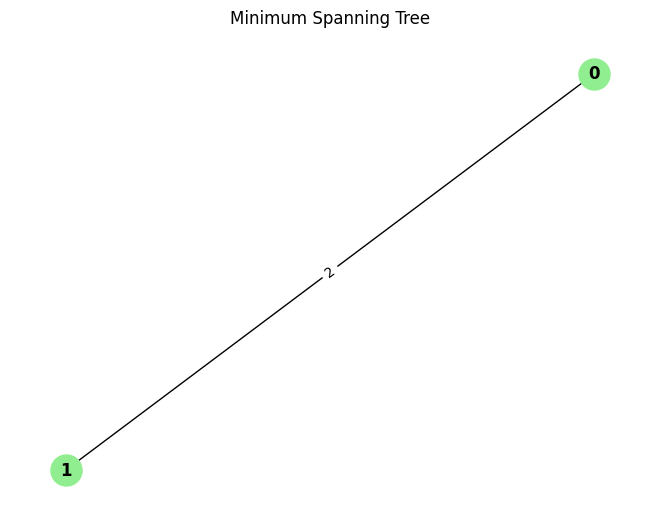

***Partial MSTs for the Original Graph

Node 2 added with parent 0


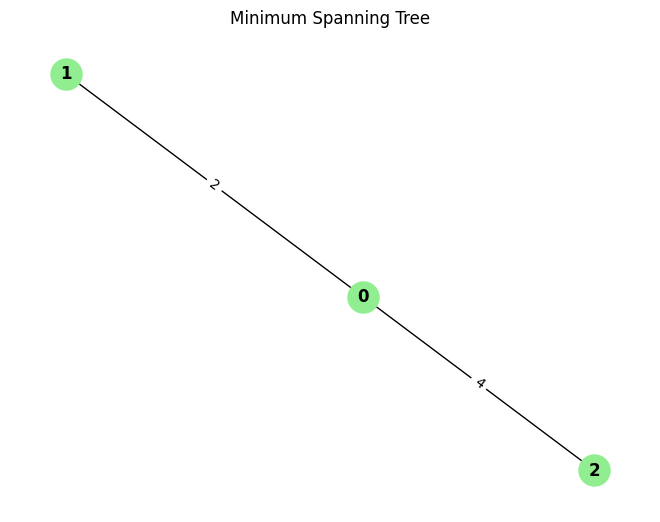

***Partial MSTs for the Original Graph

Node 3 added with parent 1


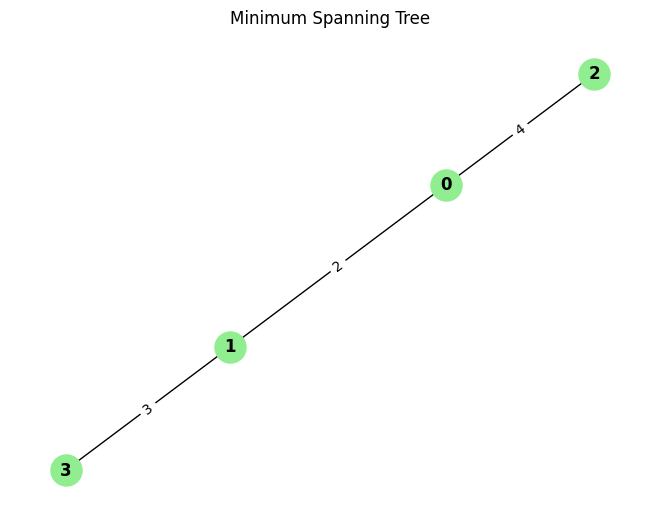

***Partial MSTs for the Original Graph

Node 4 added with parent 3


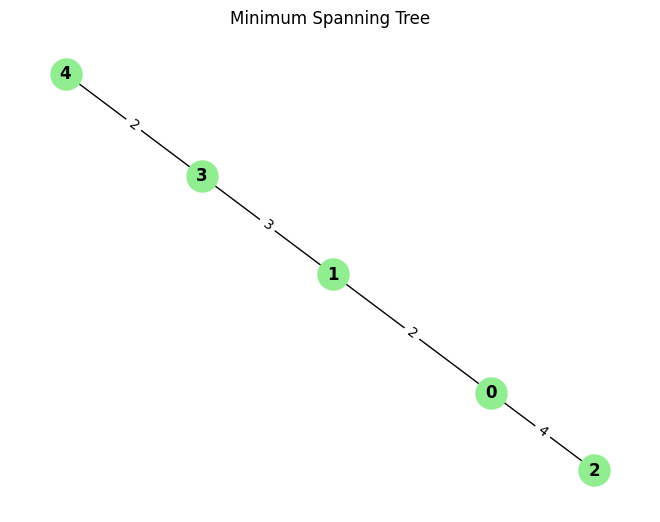

***Final MSTs for the Original Graph



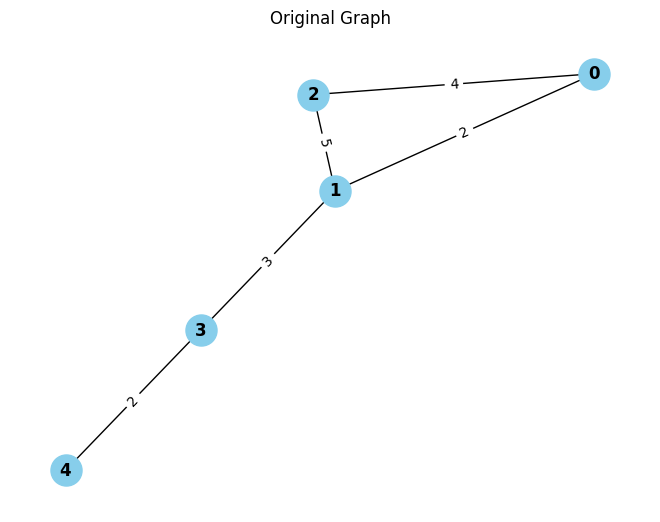

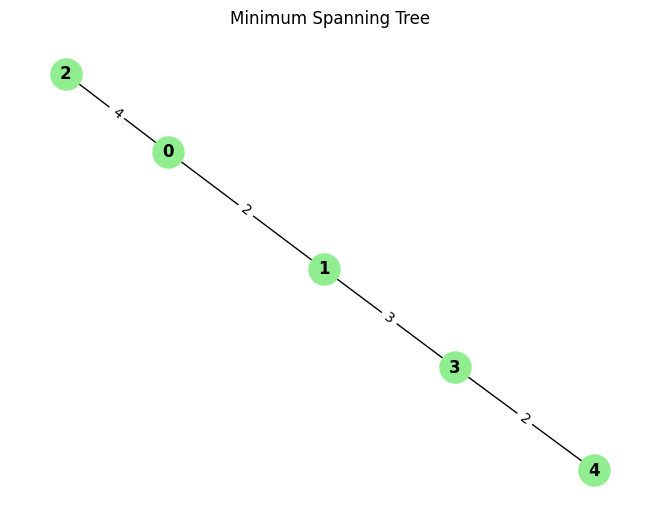

In [ ]:
# Import the sys module to access system-specific parameters like sys.maxsize
import sys
#Import the pyplot module from matplotlib for creating visualizations.
import matplotlib.pyplot as plt
#Import the networkx module for working with graph structures and visualizations.
import networkx as nx


#Finds the vertex with the minimum key value not yet included in the MST
#Returns the index of the vertex with the minimum key.
def min_key(key, mst_set, V):

    min_val = sys.maxsize
    # initializes a variable min_val to the maximum possible integer value
    #--that can be represented on the current system.
    #This is typically used as a starting point when searching for the
    #--minimum value in a set of numbers.

    min_index = None
    #store the index of the vertex with the minimum key value during the search process.
    #Setting min_index to None initially indicates that no minimum index has been found yet.

    #Iterate through the key array, comparing each element to the current minimum value.
    for v in range(len(key)):
        #If an element has a smaller key and is not already in the MST, it becomes the new minimum.

        if key[v] < min_val and not mst_set[v]:
            min_val = key[v]
            min_index = v
    return min_index


#Prim's algorithm to find the MST of the given graph.
#Adds the found vertex to the MST.
#Updates the key values of adjacent vertices, if they can be reached through the newly added vertex with a shorter path.

def prim_mst(graph):

    #Initializes variables:
    #1) V: No. of rows -- Here, The number of vertices in the graph.
    V = len(graph)

    #2)parent: An array to store the parent of each vertex in the MST as it is built.
    # Initializes a list called parent with a length of V (number of vertices)
    #For a vertex v, parent[v] will store the vertex from which v was reached.
    #This is useful for reconstructing the MST after the algorithm completes.
    parent = [None] * V

    #3)key: An array to store the key values (estimated distances from the root vertex).
    #key is created as a list that contains V elements, all initialized to sys.maxsize.
    #sys.maxsize is a constant that represents the maximum size of an integer in Python,
    #effectively serving as a representation of infinity.
    key = [sys.maxsize] * V

    #Sets the key of the root vertex (vertex 0) to 0.
    #In Prim's algorithm, we begin by choosing a starting vertex from which to grow the MST.
    #Typically, this is vertex 0 (or any arbitrary vertex).

    #Weight Initialization:
    #By setting key[0] = 0, we indicate that
    #--the cost of adding the starting vertex to the MST is zero.
    #This means that you can start with vertex 0 without needing to connect it via an edge.
    #This allows the algorithm to select vertex 0 as the first vertex in the MST,
    #as it has the minimum key value (which is now 0).

    #All other vertices in the key list remain initialized to a large value (like sys.maxsize),
    #--indicating that they are initially unreachable.
    #As the algorithm progresses, the key values for other vertices will be updated
    #--based on the weights of the edges connecting them to the vertices already included in the MST.

    #Setting key[0] = 0 is a critical step in starting the MST construction process,
    #--ensuring that the algorithm begins with the selected starting vertex.
    key[0] = 0

    #4)mst_set: A set to keep track of vertices already included in the MST.
    mst_set = [False] * V

    #Iterates V-1 times:
    #Finds the vertex with the minimum key value using min_key() function.
    #Each iteration involves:
    #--Selecting the vertex with the minimum key value not yet included in MST.
    #--Adding that vertex to the MST.
    #--Updating the key values for its adjacent vertices.
    for _ in range(V):                # _ used in place of variable name
                                          #-- not interested in how many times the loop is run till now
                                          #-- just that it should run some specific number of times overall.
        #a)Select --The function min_key(key, mst_set) is defined to find the vertex u
        #--that has the minimum key value among all vertices not yet been included
        #--in the MST (i.e., mst_set[u] is False).

        #This means it selects the next vertex to add to the MST
        #--based on the smallest weight edge available.
        u = min_key(key, mst_set, V)


        #b)Add--Marking the Vertex as Included in the MST:
        #--Mark the vertex u as included in the MST.
        #--This prevents the algorithm from selecting it again in future iterations.
        #--The mst_set list keeps track of which vertices have already been added to the MST.
        mst_set[u] = True

        for v in range(V):
            #Update the key and parent arrays while constructing the Minimum Spanning Tree (MST).
            if graph[u][v] > 0 and not mst_set[v] and key[v] > graph[u][v]:
              #3 Key Update Conditions:

              #a)Valid Edge -- graph[u][v] > 0 checks if there's a valid edge between u and v.
              #--In an adjacency matrix representation,
              #--a value greater than 0 indicates that an edge exists
              #--and its weight is given by graph[u][v].

              #b)Duplicate detection--Vertex v not already in mst_set
              #-- not mst_set[v] ensures that vertex v is not already included in the MST.
              #--The mst_set list keeps track of which vertices are part of the MST,
              #--where False indicates that the vertex is not included yet.

              #c)The condition key[v] > graph[u][v]
              #--checks if the current known minimum weight for v (stored in key[v])
              #--is greater than the weight of the edge connecting u and v.
              #--If it is true, it means we found a lighter edge (cheaper way)
              #--to connect v to the MST through vertex u.

              #If all three conditions are satisfied, it indicates that:
              #--There is an edge from u to v.
              #--Vertex v is not yet in the MST.
              #--The edge from u to v offers a lower weight than any previously known connection to v.


                #Actions Typically Taken Inside the Conditional:
                #--When this conditional evaluates to True,
                #--the following actions are usually performed:

                #--(i) Update the Key:
                #--This updates the minimum weight needed to reach vertex v.
                key[v] = graph[u][v]

                #--(ii) Update the Parent:
                #--This sets vertex u as the parent of vertex v,
                #--indicating that v is being connected to the MST via u.
                parent[v] = u

                print("***Partial MSTs for the Original Graph\n")
                print("Node",v, "added with parent",u)
                display_mst(parent, graph)

    #Calls display_graph to visualize the original graph and display_mst to visualize the MST.
    print("***Final MSTs for the Original Graph\n")
    display_graph(graph, "Original Graph")
    display_mst(parent, graph)

def display_graph(graph, title):
    G = nx.Graph()
    for i in range(len(graph)):
        for j in range(len(graph)):
            if graph[i][j] != 0:
                G.add_edge(i, j, weight=graph[i][j])

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

def display_mst(parent, graph):
    G = nx.Graph()
    for i in range(1, len(graph)):
      if parent[i] is not None: # Check if parent[i] is not None
        G.add_edge(parent[i], i, weight=graph[i][parent[i]])

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightgreen', font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree")
    plt.show()

# Example graph
graph = [
    [0, 2, 4, 0, 0],
    [2, 0, 5, 3, 0],
    [4, 5, 0, 0, 0],
    [0, 3, 0, 0, 2],
    [0, 0, 0, 2, 0]
]

#Call prim_mst() function
prim_mst(graph)

In [ ]:
#sys.maxsize
#Illustration for sys.maxsize works
numbers = [10, 5, 20, 3, 8]
min_val = sys.maxsize
print(min_val)
for num in numbers:
    if num < min_val:
        min_val = num

print("The minimum value is: ", min_val)

9223372036854775807
The minimum value is:  3
